In [1]:
import numpy as np

In [2]:
import holoviews as hv
import datashader as ds
from holoviews.operation.datashader import datashade, dynspread #, shade
# from holoviews.operation import decimate

/home/schowell/data/myPrograms/anaconda3/envs/bk_tutorial/lib/python3.6/site-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))



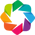

In [3]:
hv.notebook_extension('bokeh')

In [4]:
import bokeh.plotting

In [5]:
bokeh.plotting.output_notebook()

Loading BokehJS ...

# Accurately Visualize Dense Data

Lets create a sample dataset from several Gaussian distributions.

In [6]:
n_dist = 5
n_points = 10000
mu = np.random.randint(-40, 40, 2 * n_dist)
sigma = np.random.randint(1, 25, 2 * n_dist)

points = np.empty((n_dist*n_points, 2))
for i in range(n_dist):
    x = np.random.normal(loc=mu[i], scale=sigma[i], size=n_points)
    y = np.random.normal(loc=mu[i+n_dist], scale=sigma[i+n_dist], size=n_points)
    i_first = i * n_points
    i_last = (i + 1) * n_points
    points[i_first:i_last, :] = np.c_[x, y]

If we simply plot all the data points, it is difficult to see the structure of the data.

In [7]:
p = bokeh.plotting.figure()
p.circle(points[:, 0], points[:, 1])
bokeh.plotting.show(p)

 Lets add an alpha value to hopefully better see the structure of the data.

In [8]:
p = bokeh.plotting.figure()
p.circle(points[:, 0], points[:, 1], 
         alpha=0.1)
bokeh.plotting.show(p)

Maybe this is a bit improved (depending on your distributions) but maybe only because you know you have 5 Gaussian distributions.  The structure of the data is not immediately evident.

To resolve this, we can use [Datashader](https://github.com/bokeh/datashader) to faithfully represent the data.  Without going into too much detail, we will use [HoloViews](http://holoviews.org) to utilize Datashader together with Bokeh.

In HoloViews, you begin by specifying an "Element" object to contain your data, e.g., `Points` (scatterplots) or `Path` (trajectories), rather than starting out with a figure or plot.  

In [9]:
hv_points = hv.Points(points, label='Points')

Even though these objects are fundamentally data containers, not visualizations, if you ask for their representation in a Jupyter notebook, a corresponding Bokeh plot will be created.

In [10]:
hv_points

:Points   [x,y]

Now we have a HoloViews Element object.  How do we use Datashader to represent this data?

because HoloViews Elements are just containers for data and associated metadata, not plots, HoloViews can generate entirely different types of visualizations from the same data structure when appropriate.  For instance, in the plot on the left below you can see the result of adding a `decimate()` operator acting on the `points` object, which will automatically downsample this million-point dataset to at most 1000 points at any time as you zoom in or out:

In [12]:
datashade(hv_points)

:DynamicMap   []

In [13]:
%%opts RGB [width=500, height=400]
datashade(hv_points)

:DynamicMap   []

This gives us a much better understanding of the structure in our data.

In [10]:
datashade(hv_points) + dynspread(datashade(hv_points))

:Layout
   .DynamicMap.I  :DynamicMap   []
   .DynamicMap.II :DynamicMap   []

In [11]:
# Set plot and style options
hv.util.opts('Image [width=600 height=600 shared_axes=True logz=True] {+axiswise} ')
hv.util.opts("HLine VLine (color='gray' line_width=1) Layout [shared_axes=True] ")
hv.util.opts("Curve [xaxis=None yaxis=None show_grid=False, show_frame=False] (color='orangered') {+framewise}")

In [12]:
n_dist = 4
n_points = 10000
mu = np.random.randint(-40, 40, 2 * n_dist)
sigma = np.random.randint(1, 25, 2 * n_dist)

points = np.empty((n_dist*n_points, 2))
for i in range(n_dist):
    x = np.random.normal(loc=mu[i], scale=sigma[i], size=n_points)
    y = np.random.normal(loc=mu[i+n_dist], scale=sigma[i+n_dist], size=n_points)
    i_first = i * n_points
    i_last = (i + 1) * n_points
    points[i_first:i_last, :] = np.c_[x, y]

In [13]:
# Use datashader to rasterize and linked streams for interactivity
agg = aggregate(projected, link_inputs=True, x_sampling=0.0001, y_sampling=0.0001)
pointerx = hv.streams.PointerX(x=-74, source=projected)
pointery = hv.streams.PointerY(y=40.8,  source=projected)
vline = hv.DynamicMap(lambda x: hv.VLine(x), streams=[pointerx])
hline = hv.DynamicMap(lambda y: hv.HLine(y), streams=[pointery])

sampled = hv.util.Dynamic(agg, operation=lambda obj, x: obj.sample(lon=x),
                          streams=[pointerx], link_inputs=False)

hvobj = ((agg * hline * vline) << sampled.opts(plot={'Curve': dict(width=100)}))

NameError: name 'aggregate' is not defined

# To Do:
- log, eq_hist, linear
- specify cmap
- change figure size
- label axes
- legend (update interactively?)

Additional information: 
- [customizing plots using HoloViews](http://holoviews.org/user_guide/Customizing_Plots.html)

In [14]:
hv.help(hv.Points)

Points

Online example: http://holoviews.org/reference/elements/bokeh/Points.html

-------------
Style Options
-------------

	alpha, cmap, color, fill_alpha, fill_color, hover_alpha, hover_color, hover_fill_alpha, hover_fill_color, hover_line_alpha, hover_line_color, line_alpha, line_cap, line_color, line_dash, line_join, line_width, marker, muted_alpha, muted_color, muted_fill_alpha, muted_fill_color, muted_line_alpha, muted_line_color, nonselection_alpha, nonselection_color, nonselection_fill_alpha, nonselection_fill_color, nonselection_line_alpha, nonselection_line_color, palette, selection_alpha, selection_color, selection_fill_alpha, selection_fill_color, selection_line_alpha, selection_line_color, size

(Consult bokeh's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'PointPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cy

`[<plot options here>] (<style options here) {<norm options here>}`